In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
import os
sys.path.append('/'.join(os.getcwd().split('/')[:-2]))
#print(sys.path)
import util.items as items

from sklearn.preprocessing import StandardScaler

In [11]:
import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

ImportError: cannot import name 'np_utils'

In [94]:
item = 'Cannonball'

In [95]:
items.getPrices(item)[-10:]

[176, 175, 172, 171, 172, 173, 173, 172, 170, 168]

In [96]:
items.getInfo(item)

{'alchable': 'True',
 'buyLimit': '7000',
 'destroy': 'Drop',
 'edible': 'False',
 'equipable': 'False',
 'examine': 'Ammo for the Dwarf Cannon',
 'exchangePrice': '182',
 'highAlch': '3',
 'image': '/w/File:Cannonball.png',
 'lowAlch': '2',
 'members': 'True',
 'name': 'Cannonball',
 'noteable': 'True',
 'quest': 'No',
 'released': '27 May 2003',
 'seller': 'N/A',
 'stackable': 'True',
 'storeCurrency': 'N/A',
 'storeprice': 'N/A',
 'tradeable': 'True',
 'update': '/w/Update:New_Dwarf_Cannon_Quest',
 'weight': '0.0'}

1309 1338 1309


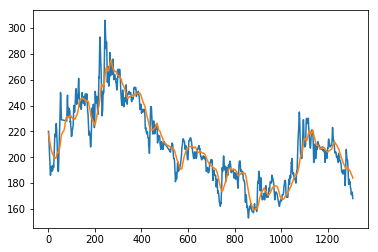

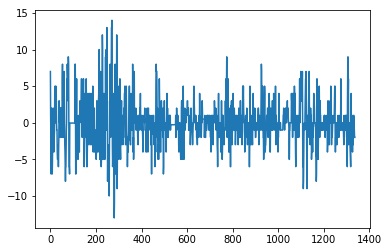

In [97]:
ma = 30
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
movAvg = items.movingAverage(item,ma)
print(len(movAvg),len(prices),len(prices[ma-1:]))
plt.plot(prices[ma-1:])
plt.plot(movAvg)
plt.plot()
plt.show()
plt.plot(changes)
plt.show()

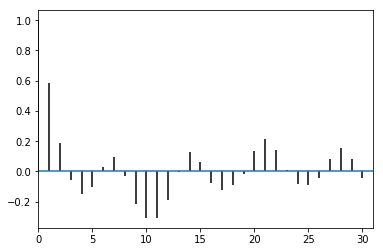

In [98]:
plt.acorr(changes,maxlags=30)
plt.xlim(0,31)
plt.show()

In [99]:
def minMax(data):
    d = []
    ma = max(data)
    mi = min(data)
    for i in range(len(data)):
        d.append((data[i]-mi)/(ma-mi))
    return d

[[ 2.29671039]
 [ 0.34209436]
 [-0.63521366]
 [-2.26406036]
 [-1.28675234]]


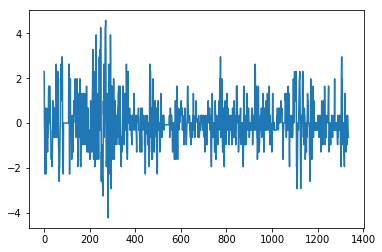

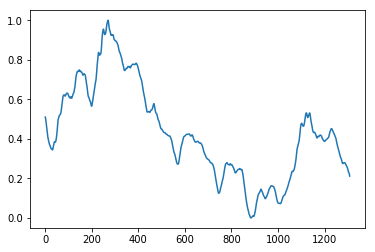

In [100]:
scaler = StandardScaler()
s_changes = scaler.fit_transform(np.array(changes).reshape(-1, 1))
print(s_changes[0:5])
s_movAvg = minMax(movAvg)
plt.plot(s_changes)
plt.show()
plt.plot(s_movAvg)
plt.show()

In [101]:
def classify(d):
    if d>=0:
        return 1
    if d<0:
        return 0
       

In [102]:
x = []
y = []
p = []
size = 10
for i in range(-1*len(s_changes),-1*size,1):
    x.append([a[0] for a in s_changes[i:i+size]])
    y.append(classify(s_changes[i+size]))
    p.append(prices[i+size])
print(x[1],y[0])
print(len(x[0]),len(x[-1]))
print(len(x),len(y),len(p))
#y = keras.utils.to_categorical(y, num_classes=2)

[0.3420943553258596, -0.6352136640559232, -2.264060363025561, -1.2867523436437782, 0.6678636951197873, 0.016325015531932045, -1.9382910232316333, -2.264060363025561, -1.6125216834377056, -0.9609830038498506] 0
10 10
1327 1327 1327


1061 1061 133 133 133 133 133
10 [ 2.29671039  0.34209436 -0.63521366 -2.26406036 -1.28675234  0.6678637
  0.01632502 -1.93829102 -2.26406036 -1.61252168]
0
10 [ 0.01632502 -0.30944432  0.01632502  0.01632502  0.01632502  0.01632502
 -0.30944432  0.01632502  0.34209436  0.01632502]
1


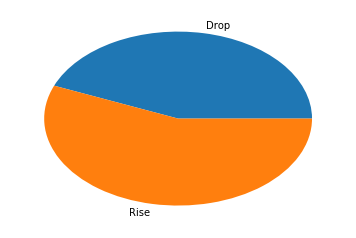

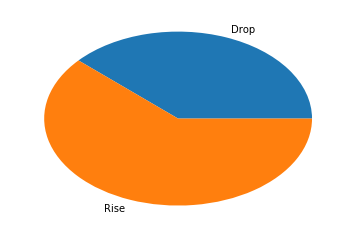

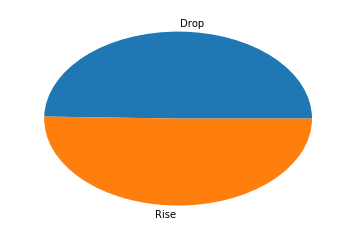

In [115]:
s1 = int(len(y)*.8)
s2  =int(len(y)*.9)
x_train = np.array(x[:s1])
y_train = np.array(y[:s1])
x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])
print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])
plt.pie([list(y_train).count(0)/len(y_train),list(y_train).count(1)/len(y_train)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_val).count(0)/len(y_val),list(y_val).count(1)/len(y_val)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_test).count(0)/len(y_test),list(y_test).count(1)/len(y_test)],labels=['Drop','Rise'])
plt.show()

In [104]:
model = Sequential()
model.add(Dense(10, input_dim=size, activation='relu'))
model.add(Dense(10, input_dim=size, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

NameError: name 'Sequential' is not defined

In [105]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=50,
            batch_size=10)
score = model.evaluate(x_test, y_test, batch_size=1)
print(score)

NameError: name 'model' is not defined

In [106]:
import IPython
keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image("test_keras_plot_model.png")

NameError: name 'keras' is not defined

In [107]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],label='Test')
plt.plot(history.history['val_acc'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [108]:
print(y_test[:20])
print(p_test[:20])

[1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0]
[208. 208. 206. 206. 205. 205. 205. 206. 206. 205. 204. 203. 199. 196.
 199. 202. 204. 205. 205. 202.]


In [109]:
y_pred = model.predict(x_test)
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()
plt.plot(y_pred[-30:],label='Pred')
plt.plot(y_test[-30:],label='Actual')
plt.legend()
plt.show()

NameError: name 'model' is not defined

In [111]:
bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test),len(y_test),len(p_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
ppBest = [[-100]] * len(budgets)
bhBest = [[-100]] * len(budgets)
perBest = [[-100]] * len(budgets)
#yp = model.predict(x_test)
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = buyAndHold(p_test,bl,budgets[b])
    ppBest[b] = perfectProfit(y_test,p_test,bl,budgets[b])
    perBest[b] = persistanceProfit(y_test,p_test,bl,budgets[b])
    #for i in range(10):
        #mp = modelProfit(t,yp,p_test,bl,budgets[b])
        #if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
         #   mpBest[b] = (mp,t)
        #t += .02

133 133 133
100000
1000000
10000000
100000000
1000000000


In [112]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tPersistance\n\t',perBest[b][-1])
    print('\tPerfect\n\t',ppBest[b][-1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

100000
	Model
	 -100 -1
	Persistance
	 -0.04738
	Perfect
	 0.56626
	Buy and Hold
	 -0.192
1000000
	Model
	 -100 -1
	Persistance
	 -0.0473745
	Perfect
	 0.56334
	Buy and Hold
	 -0.19228
10000000
	Model
	 -100 -1
	Persistance
	 0.0054288
	Perfect
	 0.2249588
	Buy and Hold
	 -0.028
100000000
	Model
	 -100 -1
	Persistance
	 -0.000105
	Perfect
	 0.02527
	Buy and Hold
	 -0.0028
1000000000
	Model
	 -100 -1
	Persistance
	 -1.05e-05
	Perfect
	 0.002527
	Buy and Hold
	 -0.00028


1 133 132 133


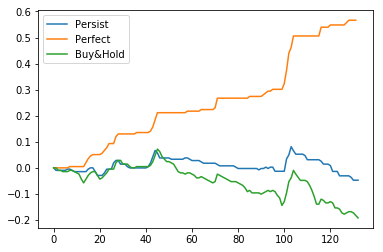

1 133 132 133


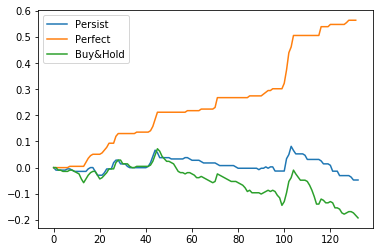

1 133 132 133


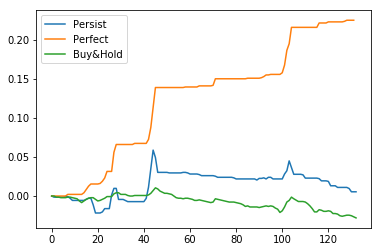

1 133 132 133


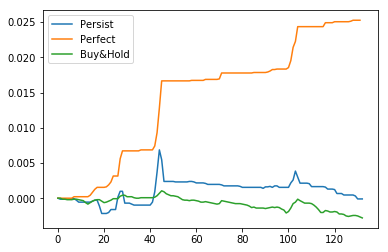

1 133 132 133


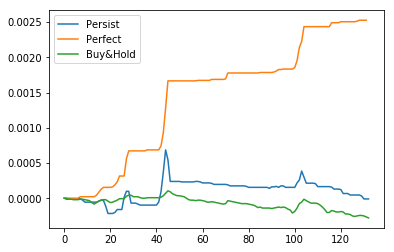

In [113]:
for b in range(len(budgets)):
    print(len(mpBest[b][0]),len(perBest[b]),len(ppBest[b]),len(bhBest[b]))
    #plt.plot(mpBest[b][0],label='Model')
    plt.plot(perBest[b],label='Persist')
    plt.plot(ppBest[b],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()